## Imbalanced Classification Dataset

Counter({0: 9900, 1: 100})


<IPython.core.display.Javascript object>


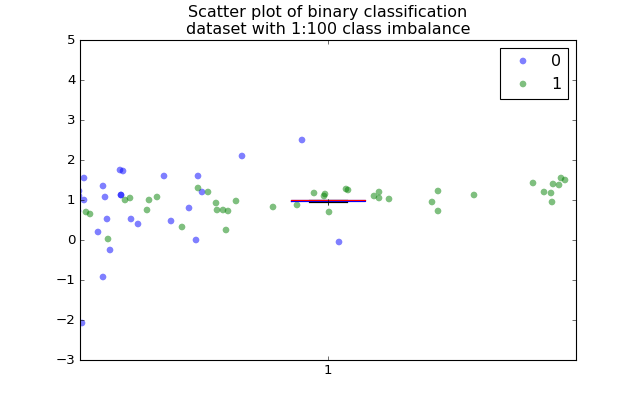

In [19]:
# Listing 16.4 Example of defining and summarizing 
# an imbalanced classification dataset
%matplotlib notebook
from collections import Counter
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import numpy as np

# define dataset
X, y = make_classification(n_samples=10000,
                           n_features=2,
                           n_redundant=0,
                           n_clusters_per_class=1,
                           weights=[0.99],
                           flip_y=0,
                           random_state=2
                          )

# summarize class distribution
counter = Counter(y)
print(counter)

# scatter plot
fig, ax = plt.subplots(1, 1, figsize=(8,5))
for label, _ in counter.items():
    row_ix = np.where(y == label)[0]
    ax.plot(X[row_ix, 0], X[row_ix, 1], label=str(label),
             marker="o", ls="none", mew=0.5, mec="none", alpha=0.5, 
            )
ax.set_title("Scatter plot of binary classification\ndataset with 1:100 class imbalance")
ax.legend(numpoints=1)
plt.show()

In [21]:
# Listing 16.7 Example of evaluating a standard logistic regression algorithm 
# on the imbalanced classification dataset
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score

# define model
model = LogisticRegression(solver="lbfgs")

# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# evaluate model
scores = cross_val_score(model, X, y, scoring="roc_auc", cv=cv, n_jobs=-1)

# summarize performance
print("Mean ROC AUC: %.4f" % np.mean(scores))

Mean ROC AUC: 0.9854


<IPython.core.display.Javascript object>


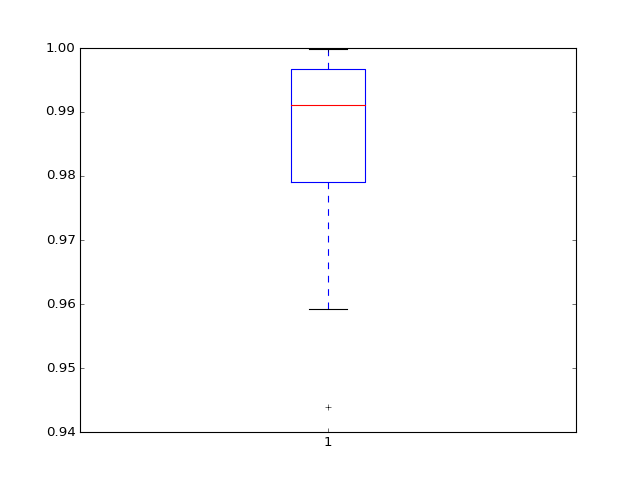

In [25]:
%matplotlib notebook
plt.boxplot(scores);

This provides a baseline for comparison for any modifications performed to the standard logistic regression algorithm.

## Logistic Regression for Imbalanced Classification

In [27]:
# Listing 16.12 Example of evaluating a class-weighted logistic regression algorithm
# on the imbalanced classification dataset

# define model
weights = {0:0.01, 1:1.0}
model = LogisticRegression(solver="lbfgs", class_weight=weights)

# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# evaluate model
scores = cross_val_score(model, X, y, scoring="roc_auc", cv=cv, n_jobs=-1)

# summarize performance
print("Mean ROC AUC: %.4f" % np.mean(scores))

Mean ROC AUC: 0.9893


The mean ROC AUC score is better than that reported by the unweighted version of logistic regression.

From the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html):

> `class_weight`: `dict` or `"balanced"`, default `None`
>
> Weights associated with classes in the form `{class_label: weight}`. If not given, all classes are supposed to have weight one.
> 
> The `"balanced"` mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data as `n_samples / (n_classes * np.bincount(y))`.
> 
> Note that these weights will be multiplied with sample_weight (passed through the fit method) if sample_weight is specified.


In [ ]:
d

## Grid Search Weighted Logistic Regression

In [29]:
# Listing 16.22 Example of a grid search of class weights for logistic regression
# on the imbalanced classification dataset
from sklearn.model_selection import GridSearchCV

# define model
model = LogisticRegression(solver="lbfgs")

# define grid
# class 0: majority
# class 1: minority
# ratio 1:100 means that for each class-1 example there are 100 class-0 examples
# the invertion of that ratio can be used with 1 for the majority class and 100 for the minority class, ie {0:1, 1:100}
balance = [
            {0:100, 1:1},   # ratio 100:1
            {0:10,  1:1},   # ratio 10:1
            {0:1,   1:1},   # ratio 1:1
            {0:1,   1:10},  # ratio 1:10
            {0:1,   1:100}  # ratio 1:100
          ]
param_grid = dict(class_weight=balance)

# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# define grid search
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=cv, scoring="roc_auc",
                    n_jobs=-1)

# execute the grid search
grid_result = grid.fit(X, y)

# report the best configuration
print("Best %.4f using %s" % (grid_result.best_score_, grid_result.best_params_))

# report all configurations
means = grid_result.cv_results_["mean_test_score"]
stds = grid_result.cv_results_["std_test_score"]
params = grid_result.cv_results_["params"]

for mean, std, param in zip(means, stds, params):
    print("mean:%.4f (std:%.4f) with %r" % (mean, std, param))
print("indicator: ROC AUC")

Best 0.9891 using {'class_weight': {0: 1, 1: 100}}
mean:0.9825 (std:0.0167) with {'class_weight': {0: 100, 1: 1}}
mean:0.9836 (std:0.0158) with {'class_weight': {0: 10, 1: 1}}
mean:0.9854 (std:0.0139) with {'class_weight': {0: 1, 1: 1}}
mean:0.9880 (std:0.0104) with {'class_weight': {0: 1, 1: 10}}
mean:0.9891 (std:0.0069) with {'class_weight': {0: 1, 1: 100}}
